In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import sys
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append('/home/alessia/Tirocinio/Fuzzy-SVM')

In [3]:
from HYP_SVM import *

In [4]:
dataset=pd.read_csv("iris-setosa.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
y=np.where(y==0,-1, y)
#print("features:\n", X, "\nLabels:\n ", y)

In [5]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

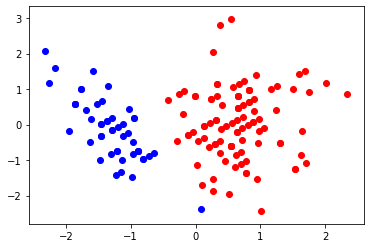

In [6]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, -1),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [7]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    #print(Y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    normalized = (Z-Z.min())/(Z.max()-Z.min())
    membership_contour = plt.contour(X, Y, normalized,
                                     levels=(.1, .3, .5, .95), colors='k')
    #print(membership_contour)
    plt.clabel(membership_contour, inline=1)

In [8]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d, y, test_size=80)

In [10]:
C_vals = [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]
sigma = [9e-2, 9e-1, 9, 9e+1, 9e+2, 9e+3, 9e+4]
parameters = {'C': C_vals, 'sigma': sigma}

model = HYP_SVM(C=100, kernel=gaussian_kernel, sigma=0.9)

clf = GridSearchCV(model, parameters, cv=5)
grid_result = clf.fit(X=xTrain, y=yTrain)

     pcost       dcost       gap    pres   dres
 0: -1.0613e+01 -3.6000e+00  2e+02  2e+01  2e-16
 1: -2.5429e+00 -1.1787e+00  2e+01  1e+00  5e-16
 2: -3.5459e-01 -9.9522e-01  1e+00  2e-02  1e-15
 3: -2.9684e-01 -3.6491e-01  7e-02  1e-17  1e-15
 4: -2.9849e-01 -2.9988e-01  1e-03  2e-17  2e-16
 5: -2.9860e-01 -2.9871e-01  1e-04  1e-17  2e-16
 6: -2.9861e-01 -2.9861e-01  6e-06  1e-17  2e-16
 7: -2.9861e-01 -2.9861e-01  9e-08  1e-17  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0613e+01 -3.6000e+00  2e+02  2e+01  2e-16
 1: -2.5429e+00 -1.1787e+00  2e+01  1e+00  5e-16
 2: -3.5459e-01 -9.9522e-01  1e+00  2e-02  1e-15
 3: -2.9684e-01 -3.6491e-01  7e-02  1e-17  1e-15
 4: -2.9849e-01 -2.9988e-01  1e-03  2e-17  2e-16
 5: -2.9860e-01 -2.9871e-01  1e-04  1e-17  2e-16
 6: -2.9861e-01 -2.9861e-01  6e-06  1e-17  2e-16
 7: -2.9861e-01 -2.9861e-01  9e-08  1e-17  2e-16
Optimal solution found.
[-0.4646463  -0.4645728  -0.46464271 -0.45456569 -0.46457568 -0.46457568

     pcost       dcost       gap    pres   dres
 0: -3.4674e+00 -2.5125e+00  2e+02  1e+01  2e-16
 1: -2.0394e+00 -1.6948e+00  1e+01  1e+00  4e-16
 2: -2.7679e-01 -1.0136e+00  1e+00  1e-02  2e-15
 3: -3.2136e-01 -4.3485e-01  1e-01  2e-03  5e-16
 4: -3.4100e-01 -3.8252e-01  4e-02  2e-04  3e-16
 5: -3.4707e-01 -3.5285e-01  6e-03  2e-05  5e-16
 6: -3.4881e-01 -3.5000e-01  1e-03  3e-06  3e-16
 7: -3.4926e-01 -3.4945e-01  2e-04  4e-07  5e-16
 8: -3.4936e-01 -3.4938e-01  2e-05  1e-08  5e-16
 9: -3.4937e-01 -3.4937e-01  6e-07  3e-10  5e-16
10: -3.4937e-01 -3.4937e-01  1e-08  3e-12  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4674e+00 -2.5125e+00  2e+02  1e+01  2e-16
 1: -2.0394e+00 -1.6948e+00  1e+01  1e+00  4e-16
 2: -2.7679e-01 -1.0136e+00  1e+00  1e-02  2e-15
 3: -3.2136e-01 -4.3485e-01  1e-01  2e-03  5e-16
 4: -3.4100e-01 -3.8252e-01  4e-02  2e-04  3e-16
 5: -3.4707e-01 -3.5285e-01  6e-03  2e-05  5e-16
 6: -3.4881e-01 -3.5000e-01  1e-03  3e-06  3e-1

     pcost       dcost       gap    pres   dres
 0: -1.5417e+01 -3.0933e+00  3e+02  2e+01  5e-16
 1: -1.7099e+00 -1.1712e+00  1e+01  7e-01  5e-16
 2: -3.6550e-01 -1.0165e+00  9e-01  2e-02  1e-15
 3: -3.1800e-01 -3.6566e-01  5e-02  2e-05  4e-15
 4: -3.1913e-01 -3.2077e-01  2e-03  7e-07  7e-16
 5: -3.1931e-01 -3.1979e-01  5e-04  1e-07  3e-16
 6: -3.1942e-01 -3.1959e-01  2e-04  4e-08  4e-16
 7: -3.1945e-01 -3.1953e-01  8e-05  1e-08  3e-16
 8: -3.1947e-01 -3.1951e-01  3e-05  6e-09  4e-16
 9: -3.1948e-01 -3.1949e-01  7e-06  7e-10  4e-16
10: -3.1948e-01 -3.1948e-01  8e-07  2e-11  5e-16
11: -3.1948e-01 -3.1948e-01  7e-08  2e-12  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5417e+01 -3.0933e+00  3e+02  2e+01  5e-16
 1: -1.7099e+00 -1.1712e+00  1e+01  7e-01  5e-16
 2: -3.6550e-01 -1.0165e+00  9e-01  2e-02  1e-15
 3: -3.1800e-01 -3.6566e-01  5e-02  2e-05  4e-15
 4: -3.1913e-01 -3.2077e-01  2e-03  7e-07  7e-16
 5: -3.1931e-01 -3.1979e-01  5e-04  1e-07  3e-1

     pcost       dcost       gap    pres   dres
 0: -2.4672e+01 -1.1854e+00  3e+02  2e+01  6e-16
 1: -6.0741e-01 -1.1792e+00  4e+00  2e-01  8e-16
 2: -3.5742e-01 -8.1858e-01  5e-01  3e-04  7e-16
 3: -3.5990e-01 -3.6513e-01  5e-03  3e-06  5e-16
 4: -3.6000e-01 -3.6005e-01  5e-05  3e-08  4e-16
 5: -3.6000e-01 -3.6000e-01  7e-07  4e-10  4e-16
 6: -3.6000e-01 -3.6000e-01  9e-08  6e-11  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4672e+01 -1.1854e+00  3e+02  2e+01  6e-16
 1: -6.0741e-01 -1.1792e+00  4e+00  2e-01  8e-16
 2: -3.5742e-01 -8.1858e-01  5e-01  3e-04  7e-16
 3: -3.5990e-01 -3.6513e-01  5e-03  3e-06  5e-16
 4: -3.6000e-01 -3.6005e-01  5e-05  3e-08  4e-16
 5: -3.6000e-01 -3.6000e-01  7e-07  4e-10  4e-16
 6: -3.6000e-01 -3.6000e-01  9e-08  6e-11  4e-16
Optimal solution found.
[-0.35714182 -0.35714306 -0.35714317 -0.35714282 -0.35714326 -0.35714324
 -0.35714317 -0.35714317 -0.35714217 -0.35714314 -0.35714279 -0.35714292
 -0.35714295 -0.3571433 

     pcost       dcost       gap    pres   dres
 0: -2.1210e+01 -1.1907e+00  3e+02  2e+01  6e-16
 1: -5.2084e-01 -1.1840e+00  4e+00  2e-01  9e-16
 2: -2.8841e-01 -7.9888e-01  6e-01  4e-03  6e-16
 3: -2.7981e-01 -2.8756e-01  8e-03  3e-05  2e-15
 4: -2.8000e-01 -2.8008e-01  8e-05  3e-07  4e-16
 5: -2.8000e-01 -2.8000e-01  8e-07  3e-09  5e-16
 6: -2.8000e-01 -2.8000e-01  8e-09  3e-11  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1210e+01 -1.1907e+00  3e+02  2e+01  6e-16
 1: -5.2084e-01 -1.1840e+00  4e+00  2e-01  9e-16
 2: -2.8841e-01 -7.9888e-01  6e-01  4e-03  6e-16
 3: -2.7981e-01 -2.8756e-01  8e-03  3e-05  2e-15
 4: -2.8000e-01 -2.8008e-01  8e-05  3e-07  4e-16
 5: -2.8000e-01 -2.8000e-01  8e-07  3e-09  5e-16
 6: -2.8000e-01 -2.8000e-01  8e-09  3e-11  4e-16
Optimal solution found.
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  1.1071428570474888
 

     pcost       dcost       gap    pres   dres
 0: -3.4387e+00 -9.5565e+00  2e+02  1e+01  3e-16
 1: -2.4603e+00 -8.6694e+00  1e+01  5e-01  4e-16
 2: -2.2286e+00 -3.6289e+00  1e+00  2e-16  4e-16
 3: -2.3450e+00 -2.6253e+00  3e-01  3e-16  3e-16
 4: -2.4078e+00 -2.4925e+00  8e-02  2e-16  2e-16
 5: -2.4263e+00 -2.4605e+00  3e-02  2e-16  2e-16
 6: -2.4355e+00 -2.4483e+00  1e-02  3e-16  2e-16
 7: -2.4390e+00 -2.4430e+00  4e-03  4e-16  2e-16
 8: -2.4408e+00 -2.4409e+00  1e-04  3e-16  2e-16
 9: -2.4408e+00 -2.4408e+00  1e-06  2e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4387e+00 -9.5565e+00  2e+02  1e+01  3e-16
 1: -2.4603e+00 -8.6694e+00  1e+01  5e-01  4e-16
 2: -2.2286e+00 -3.6289e+00  1e+00  2e-16  4e-16
 3: -2.3450e+00 -2.6253e+00  3e-01  3e-16  3e-16
 4: -2.4078e+00 -2.4925e+00  8e-02  2e-16  2e-16
 5: -2.4263e+00 -2.4605e+00  3e-02  2e-16  2e-16
 6: -2.4355e+00 -2.4483e+00  1e-02  3e-16  2e-16
 7: -2.4390e+00 -2.4430e+00  4e-03  4e-16  2e-1

     pcost       dcost       gap    pres   dres
 0: -2.4047e+01 -1.1990e+01  3e+02  2e+01  9e-16
 1: -3.4196e+00 -1.1344e+01  1e+01  3e-01  1e-15
 2: -2.9666e+00 -3.8434e+00  9e-01  2e-16  1e-15
 3: -2.9985e+00 -3.0093e+00  1e-02  1e-16  7e-16
 4: -2.9993e+00 -3.0004e+00  1e-03  1e-16  5e-16
 5: -2.9995e+00 -3.0000e+00  5e-04  2e-16  3e-16
 6: -2.9996e+00 -2.9997e+00  1e-04  1e-16  3e-16
 7: -2.9996e+00 -2.9997e+00  4e-05  1e-16  3e-16
 8: -2.9996e+00 -2.9997e+00  2e-05  1e-16  3e-16
 9: -2.9997e+00 -2.9997e+00  1e-06  1e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4047e+01 -1.1990e+01  3e+02  2e+01  9e-16
 1: -3.4196e+00 -1.1344e+01  1e+01  3e-01  1e-15
 2: -2.9666e+00 -3.8434e+00  9e-01  2e-16  1e-15
 3: -2.9985e+00 -3.0093e+00  1e-02  1e-16  7e-16
 4: -2.9993e+00 -3.0004e+00  1e-03  1e-16  5e-16
 5: -2.9995e+00 -3.0000e+00  5e-04  2e-16  3e-16
 6: -2.9996e+00 -2.9997e+00  1e-04  1e-16  3e-16
 7: -2.9996e+00 -2.9997e+00  4e-05  1e-16  3e-1

     pcost       dcost       gap    pres   dres
 0: -2.5141e+01 -1.1955e+01  3e+02  2e+01  7e-16
 1: -3.5737e+00 -1.1360e+01  1e+01  2e-01  9e-16
 2: -3.1676e+00 -3.9175e+00  7e-01  1e-16  1e-15
 3: -3.1994e+00 -3.2075e+00  8e-03  1e-16  8e-16
 4: -3.2000e+00 -3.2001e+00  9e-05  1e-16  7e-16
 5: -3.2000e+00 -3.2000e+00  1e-05  1e-16  4e-16
 6: -3.2000e+00 -3.2000e+00  4e-06  1e-16  3e-16
 7: -3.2000e+00 -3.2000e+00  1e-06  2e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5141e+01 -1.1955e+01  3e+02  2e+01  7e-16
 1: -3.5737e+00 -1.1360e+01  1e+01  2e-01  9e-16
 2: -3.1676e+00 -3.9175e+00  7e-01  1e-16  1e-15
 3: -3.1994e+00 -3.2075e+00  8e-03  1e-16  8e-16
 4: -3.2000e+00 -3.2001e+00  9e-05  1e-16  7e-16
 5: -3.2000e+00 -3.2000e+00  1e-05  1e-16  4e-16
 6: -3.2000e+00 -3.2000e+00  4e-06  1e-16  3e-16
 7: -3.2000e+00 -3.2000e+00  1e-06  2e-16  4e-16
Optimal solution found.
[-0.42856953 -0.42856647 -0.42856686 -0.42857238 -0.42857361 -0.42856524

     pcost       dcost       gap    pres   dres
 0: -2.6871e+01 -1.1907e+01  3e+02  2e+01  7e-16
 1: -3.8395e+00 -1.1352e+01  1e+01  2e-01  8e-16
 2: -3.5720e+00 -4.0589e+00  5e-01  2e-16  8e-16
 3: -3.5997e+00 -3.6047e+00  5e-03  1e-16  6e-16
 4: -3.6000e+00 -3.6000e+00  5e-05  1e-16  8e-16
 5: -3.6000e+00 -3.6000e+00  5e-07  1e-16  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6871e+01 -1.1907e+01  3e+02  2e+01  7e-16
 1: -3.8395e+00 -1.1352e+01  1e+01  2e-01  8e-16
 2: -3.5720e+00 -4.0589e+00  5e-01  2e-16  8e-16
 3: -3.5997e+00 -3.6047e+00  5e-03  1e-16  6e-16
 4: -3.6000e+00 -3.6000e+00  5e-05  1e-16  8e-16
 5: -3.6000e+00 -3.6000e+00  5e-07  1e-16  5e-16
Optimal solution found.
[-0.35714286 -0.35714286 -0.35714286 -0.35714286 -0.35714286 -0.35714286
 -0.35714286 -0.35714286 -0.35714286 -0.35714286 -0.35714286 -0.35714286
 -0.35714286 -0.35714286]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.6173469381629068

     pcost       dcost       gap    pres   dres
 0: -4.1471e+00 -7.4069e+01  2e+02  1e+00  4e-16
 1: -2.9427e+00 -3.1515e+01  3e+01  3e-16  3e-16
 2: -4.6439e+00 -9.2880e+00  5e+00  6e-16  4e-16
 3: -5.4072e+00 -6.5026e+00  1e+00  3e-16  3e-16
 4: -5.6878e+00 -5.9122e+00  2e-01  2e-16  2e-16
 5: -5.7500e+00 -5.7817e+00  3e-02  3e-16  2e-16
 6: -5.7603e+00 -5.7610e+00  7e-04  7e-16  2e-16
 7: -5.7605e+00 -5.7605e+00  1e-05  2e-16  2e-16
 8: -5.7605e+00 -5.7605e+00  2e-07  4e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1471e+00 -7.4069e+01  2e+02  1e+00  4e-16
 1: -2.9427e+00 -3.1515e+01  3e+01  3e-16  3e-16
 2: -4.6439e+00 -9.2880e+00  5e+00  6e-16  4e-16
 3: -5.4072e+00 -6.5026e+00  1e+00  3e-16  3e-16
 4: -5.6878e+00 -5.9122e+00  2e-01  2e-16  2e-16
 5: -5.7500e+00 -5.7817e+00  3e-02  3e-16  2e-16
 6: -5.7603e+00 -5.7610e+00  7e-04  7e-16  2e-16
 7: -5.7605e+00 -5.7605e+00  1e-05  2e-16  2e-16
 8: -5.7605e+00 -5.7605e+00  2e-07  4e-16  3e-1

     pcost       dcost       gap    pres   dres
 0: -4.7002e+01 -1.2521e+02  4e+02  2e+00  2e-15
 1: -3.2719e+01 -8.0579e+01  5e+01  3e-16  1e-15
 2: -3.3822e+01 -3.4777e+01  1e+00  8e-16  1e-15
 3: -3.3903e+01 -3.4026e+01  1e-01  2e-16  1e-15
 4: -3.3933e+01 -3.3951e+01  2e-02  4e-16  1e-15
 5: -3.3941e+01 -3.3945e+01  4e-03  4e-16  1e-15
 6: -3.3942e+01 -3.3943e+01  1e-03  2e-16  7e-16
 7: -3.3943e+01 -3.3943e+01  2e-04  3e-16  9e-16
 8: -3.3943e+01 -3.3943e+01  3e-06  4e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.7002e+01 -1.2521e+02  4e+02  2e+00  2e-15
 1: -3.2719e+01 -8.0579e+01  5e+01  3e-16  1e-15
 2: -3.3822e+01 -3.4777e+01  1e+00  8e-16  1e-15
 3: -3.3903e+01 -3.4026e+01  1e-01  2e-16  1e-15
 4: -3.3933e+01 -3.3951e+01  2e-02  4e-16  1e-15
 5: -3.3941e+01 -3.3945e+01  4e-03  4e-16  1e-15
 6: -3.3942e+01 -3.3943e+01  1e-03  2e-16  7e-16
 7: -3.3943e+01 -3.3943e+01  2e-04  3e-16  9e-16
 8: -3.3943e+01 -3.3943e+01  3e-06  4e-16  1e-1

     pcost       dcost       gap    pres   dres
 0: -4.3929e+01 -1.2593e+02  4e+02  2e+00  1e-15
 1: -2.9329e+01 -7.9733e+01  5e+01  7e-16  1e-15
 2: -2.9931e+01 -3.0677e+01  7e-01  3e-16  1e-15
 3: -2.9999e+01 -3.0007e+01  7e-03  3e-16  1e-15
 4: -3.0000e+01 -3.0000e+01  9e-05  7e-16  1e-15
 5: -3.0000e+01 -3.0000e+01  1e-05  3e-16  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.3929e+01 -1.2593e+02  4e+02  2e+00  1e-15
 1: -2.9329e+01 -7.9733e+01  5e+01  7e-16  1e-15
 2: -2.9931e+01 -3.0677e+01  7e-01  3e-16  1e-15
 3: -2.9999e+01 -3.0007e+01  7e-03  3e-16  1e-15
 4: -3.0000e+01 -3.0000e+01  9e-05  7e-16  1e-15
 5: -3.0000e+01 -3.0000e+01  1e-05  3e-16  8e-16
Optimal solution found.
[-0.46428583 -0.46428532 -0.46428577 -0.46428498 -0.4642863  -0.46428483
 -0.46428593 -0.4642859  -0.46428518 -0.46428575 -0.46428504 -0.46428596
 -0.46428603 -0.46428593]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.950254275437349


     pcost       dcost       gap    pres   dres
 0: -4.5714e+01 -1.2571e+02  4e+02  2e+00  2e-15
 1: -3.1096e+01 -8.0315e+01  5e+01  1e-15  1e-15
 2: -3.1923e+01 -3.2699e+01  8e-01  8e-16  9e-16
 3: -3.1999e+01 -3.2007e+01  8e-03  7e-16  7e-16
 4: -3.2000e+01 -3.2000e+01  8e-05  6e-16  7e-16
 5: -3.2000e+01 -3.2000e+01  9e-07  5e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.5714e+01 -1.2571e+02  4e+02  2e+00  2e-15
 1: -3.1096e+01 -8.0315e+01  5e+01  1e-15  1e-15
 2: -3.1923e+01 -3.2699e+01  8e-01  8e-16  9e-16
 3: -3.1999e+01 -3.2007e+01  8e-03  7e-16  7e-16
 4: -3.2000e+01 -3.2000e+01  8e-05  6e-16  7e-16
 5: -3.2000e+01 -3.2000e+01  9e-07  5e-16  1e-15
Optimal solution found.
[-0.42857143 -0.42857142 -0.42857142 -0.42857143 -0.42857143 -0.42857142
 -0.42857143 -0.42857143 -0.42857144 -0.42857144 -0.42857143 -0.42857142
 -0.42857143 -0.42857143]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.8163265241499936

     pcost       dcost       gap    pres   dres
 0:  1.4502e+02 -1.3910e+03  2e+03  2e-01  2e-15
 1:  6.1942e+01 -1.6003e+02  2e+02  1e-02  2e-15
 2:  3.8997e+00 -2.5020e+01  3e+01  3e-15  1e-15
 3: -4.0730e+00 -1.0252e+01  6e+00  6e-16  8e-16
 4: -6.8381e+00 -8.0395e+00  1e+00  2e-15  5e-16
 5: -7.2958e+00 -7.4689e+00  2e-01  1e-15  5e-16
 6: -7.3820e+00 -7.3986e+00  2e-02  3e-15  6e-16
 7: -7.3888e+00 -7.3890e+00  2e-04  2e-15  5e-16
 8: -7.3889e+00 -7.3889e+00  2e-06  6e-16  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4502e+02 -1.3910e+03  2e+03  2e-01  2e-15
 1:  6.1942e+01 -1.6003e+02  2e+02  1e-02  2e-15
 2:  3.8997e+00 -2.5020e+01  3e+01  3e-15  1e-15
 3: -4.0730e+00 -1.0252e+01  6e+00  6e-16  8e-16
 4: -6.8381e+00 -8.0395e+00  1e+00  2e-15  5e-16
 5: -7.2958e+00 -7.4689e+00  2e-01  1e-15  5e-16
 6: -7.3820e+00 -7.3986e+00  2e-02  3e-15  6e-16
 7: -7.3888e+00 -7.3890e+00  2e-04  2e-15  5e-16
 8: -7.3889e+00 -7.3889e+00  2e-06  6e-16  5e-1

     pcost       dcost       gap    pres   dres
 0: -2.5413e+02 -1.8423e+03  2e+03  3e-15  8e-15
 1: -2.8382e+02 -3.9146e+02  1e+02  9e-16  8e-15
 2: -3.2788e+02 -3.4175e+02  1e+01  2e-15  7e-15
 3: -3.3304e+02 -3.3506e+02  2e+00  1e-14  7e-15
 4: -3.3408e+02 -3.3443e+02  3e-01  9e-15  9e-15
 5: -3.3425e+02 -3.3432e+02  8e-02  7e-15  1e-14
 6: -3.3429e+02 -3.3430e+02  7e-03  1e-14  1e-14
 7: -3.3429e+02 -3.3429e+02  9e-05  2e-14  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5413e+02 -1.8423e+03  2e+03  3e-15  8e-15
 1: -2.8382e+02 -3.9146e+02  1e+02  9e-16  8e-15
 2: -3.2788e+02 -3.4175e+02  1e+01  2e-15  7e-15
 3: -3.3304e+02 -3.3506e+02  2e+00  1e-14  7e-15
 4: -3.3408e+02 -3.3443e+02  3e-01  9e-15  9e-15
 5: -3.3425e+02 -3.3432e+02  8e-02  7e-15  1e-14
 6: -3.3429e+02 -3.3430e+02  7e-03  1e-14  1e-14
 7: -3.3429e+02 -3.3429e+02  9e-05  2e-14  1e-14
Optimal solution found.
[-0.33769654 -0.41470161 -0.41807299 -0.38965754 -0.41994206 -0.45111804

     pcost       dcost       gap    pres   dres
 0: -2.5137e+02 -1.8742e+03  2e+03  4e-15  6e-15
 1: -2.7843e+02 -3.6859e+02  9e+01  8e-15  6e-15
 2: -3.1950e+02 -3.2161e+02  2e+00  7e-15  7e-15
 3: -3.1989e+02 -3.2004e+02  1e-01  3e-14  8e-15
 4: -3.1994e+02 -3.1996e+02  2e-02  2e-14  8e-15
 5: -3.1995e+02 -3.1995e+02  4e-03  3e-15  9e-15
 6: -3.1995e+02 -3.1995e+02  6e-04  1e-14  8e-15
 7: -3.1995e+02 -3.1995e+02  2e-05  2e-14  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5137e+02 -1.8742e+03  2e+03  4e-15  6e-15
 1: -2.7843e+02 -3.6859e+02  9e+01  8e-15  6e-15
 2: -3.1950e+02 -3.2161e+02  2e+00  7e-15  7e-15
 3: -3.1989e+02 -3.2004e+02  1e-01  3e-14  8e-15
 4: -3.1994e+02 -3.1996e+02  2e-02  2e-14  8e-15
 5: -3.1995e+02 -3.1995e+02  4e-03  3e-15  9e-15
 6: -3.1995e+02 -3.1995e+02  6e-04  1e-14  8e-15
 7: -3.1995e+02 -3.1995e+02  2e-05  2e-14  1e-14
Optimal solution found.
[-0.42839151 -0.42808892 -0.42811915 -0.42866382 -0.42878486 -0.42796788

 1: -2.4955e+02 -3.2332e+02  7e+01  3e-15  5e-15
 2: -2.7970e+02 -2.8110e+02  1e+00  9e-16  5e-15
 3: -2.8000e+02 -2.8001e+02  1e-02  9e-16  6e-15
 4: -2.8000e+02 -2.8000e+02  2e-04  6e-15  5e-15
Optimal solution found.
[-0.49999994 -0.49999995 -0.49999994 -0.49999993 -0.49999994 -0.50000002
 -0.50000005 -0.50000004 -0.49999995 -0.50000003 -0.50000004 -0.50000002
 -0.50000003 -0.50000006]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  1.1071427617984404
     pcost       dcost       gap    pres   dres
 0: -2.6871e+02 -1.8271e+03  2e+03  7e-15  7e-15
 1: -3.0650e+02 -4.1292e+02  1e+02  1e-16  7e-15
 2: -3.5946e+02 -3.6256e+02  3e+00  2e-15  6e-15
 3: -3.5999e+02 -3.6003e+02  3e-02  8e-15  7e-15
 4: -3.6000e+02 -3.6000e+02  3e-04  1e-14  8e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6871e+02 -1.8271e+03  2e+03  7e-15  7e-15
 1: -3.0650e+02 -4.1292e+02  1e+02  1e-16  7e-15
 2: -3.5946e+02 -3.6256e+02  3e+00  2e-15  6e-15

     pcost       dcost       gap    pres   dres
 0:  1.6382e+04 -7.9968e+04  1e+05  3e-02  2e-14
 1:  4.4091e+03 -7.7121e+03  1e+04  2e-03  3e-14
 2:  6.4427e+02 -8.3588e+02  1e+03  1e-14  1e-14
 3:  7.8861e+01 -1.3370e+02  2e+02  3e-15  8e-15
 4:  4.5061e+00 -2.4998e+01  3e+01  2e-15  2e-15
 5: -3.7279e+00 -8.2691e+00  5e+00  1e-15  7e-16
 6: -5.3561e+00 -6.6453e+00  1e+00  2e-16  4e-16
 7: -5.8141e+00 -6.1208e+00  3e-01  3e-15  5e-16
 8: -5.9461e+00 -5.9946e+00  5e-02  2e-15  5e-16
 9: -5.9679e+00 -5.9702e+00  2e-03  2e-16  4e-16
10: -5.9689e+00 -5.9690e+00  5e-05  4e-16  5e-16
11: -5.9690e+00 -5.9690e+00  5e-07  8e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6382e+04 -7.9968e+04  1e+05  3e-02  2e-14
 1:  4.4091e+03 -7.7121e+03  1e+04  2e-03  3e-14
 2:  6.4427e+02 -8.3588e+02  1e+03  1e-14  1e-14
 3:  7.8861e+01 -1.3370e+02  2e+02  3e-15  8e-15
 4:  4.5061e+00 -2.4998e+01  3e+01  2e-15  2e-15
 5: -3.7279e+00 -8.2691e+00  5e+00  1e-15  7e-1

     pcost       dcost       gap    pres   dres
 0:  1.4090e+04 -1.3861e+05  2e+05  6e-14  5e-14
 1:  6.7497e+03 -1.7531e+04  2e+04  5e-14  4e-14
 2:  9.5457e+02 -2.4475e+03  3e+03  5e-15  3e-14
 3:  6.9405e+01 -6.7457e+02  7e+02  3e-14  2e-14
 4: -2.8489e+01 -7.0064e+02  7e+02  3e-15  2e-14
 5: -1.5118e+02 -5.8394e+02  4e+02  6e-14  3e-14
 6: -2.3904e+02 -4.4067e+02  2e+02  4e-15  2e-14
 7: -2.9738e+02 -3.7294e+02  8e+01  2e-14  2e-14
 8: -3.1797e+02 -3.3259e+02  1e+01  3e-14  3e-14
 9: -3.2270e+02 -3.2664e+02  4e+00  3e-14  3e-14
10: -3.2436e+02 -3.2442e+02  6e-02  1e-14  3e-14
11: -3.2439e+02 -3.2439e+02  6e-04  5e-15  3e-14
12: -3.2439e+02 -3.2439e+02  6e-06  3e-14  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4090e+04 -1.3861e+05  2e+05  6e-14  5e-14
 1:  6.7497e+03 -1.7531e+04  2e+04  5e-14  4e-14
 2:  9.5457e+02 -2.4475e+03  3e+03  5e-15  3e-14
 3:  6.9405e+01 -6.7457e+02  7e+02  3e-14  2e-14
 4: -2.8489e+01 -7.0064e+02  7e+02  3e-15  2e-1

     pcost       dcost       gap    pres   dres
 0: -2.2149e+03 -8.1528e+04  8e+04  1e-13  7e-14
 1: -2.2603e+03 -3.8565e+03  2e+03  7e-14  7e-14
 2: -2.9734e+03 -3.0209e+03  5e+01  4e-14  5e-14
 3: -2.9909e+03 -3.0007e+03  1e+01  7e-15  7e-14
 4: -2.9954e+03 -2.9973e+03  2e+00  9e-14  7e-14
 5: -2.9963e+03 -2.9968e+03  5e-01  2e-13  9e-14
 6: -2.9964e+03 -2.9967e+03  2e-01  9e-14  8e-14
 7: -2.9965e+03 -2.9966e+03  3e-02  3e-14  8e-14
 8: -2.9966e+03 -2.9966e+03  3e-04  3e-14  8e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2149e+03 -8.1528e+04  8e+04  1e-13  7e-14
 1: -2.2603e+03 -3.8565e+03  2e+03  7e-14  7e-14
 2: -2.9734e+03 -3.0209e+03  5e+01  4e-14  5e-14
 3: -2.9909e+03 -3.0007e+03  1e+01  7e-15  7e-14
 4: -2.9954e+03 -2.9973e+03  2e+00  9e-14  7e-14
 5: -2.9963e+03 -2.9968e+03  5e-01  2e-13  9e-14
 6: -2.9964e+03 -2.9967e+03  2e-01  9e-14  8e-14
 7: -2.9965e+03 -2.9966e+03  3e-02  3e-14  8e-14
 8: -2.9966e+03 -2.9966e+03  3e-04  3e-14  8e-1

     pcost       dcost       gap    pres   dres
 0: -2.1210e+03 -8.1900e+04  8e+04  2e-14  6e-14
 1: -2.1589e+03 -3.6570e+03  1e+03  1e-13  6e-14
 2: -2.7775e+03 -2.8179e+03  4e+01  2e-13  7e-14
 3: -2.7996e+03 -2.8002e+03  6e-01  1e-13  8e-14
 4: -2.7999e+03 -2.8000e+03  1e-01  1e-13  6e-14
 5: -2.8000e+03 -2.8000e+03  1e-02  8e-14  6e-14
 6: -2.8000e+03 -2.8000e+03  2e-03  1e-13  8e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1210e+03 -8.1900e+04  8e+04  2e-14  6e-14
 1: -2.1589e+03 -3.6570e+03  1e+03  1e-13  6e-14
 2: -2.7775e+03 -2.8179e+03  4e+01  2e-13  7e-14
 3: -2.7996e+03 -2.8002e+03  6e-01  1e-13  8e-14
 4: -2.7999e+03 -2.8000e+03  1e-01  1e-13  6e-14
 5: -2.8000e+03 -2.8000e+03  1e-02  8e-14  6e-14
 6: -2.8000e+03 -2.8000e+03  2e-03  1e-13  8e-14
Optimal solution found.
[-0.49995259 -0.49996564 -0.4999583  -0.49994938 -0.49995259 -0.50001108
 -0.50003626 -0.50003126 -0.49996165 -0.50002156 -0.50003134 -0.50001108
 -0.50002149 -0.50004581

     pcost       dcost       gap    pres   dres
 0:  2.7627e+06 -9.3053e+06  1e+07  2e-12  2e-13
 1:  7.0270e+05 -1.0015e+06  2e+06  2e-13  2e-13
 2:  1.0416e+05 -1.2764e+05  2e+05  1e-13  5e-14
 3:  1.4726e+04 -1.7700e+04  3e+04  2e-13  3e-14
 4:  1.9829e+03 -2.6384e+03  5e+03  7e-14  8e-15
 5:  2.2802e+02 -4.2987e+02  7e+02  2e-14  3e-15
 6:  4.8408e+00 -8.6496e+01  9e+01  3e-15  1e-15
 7: -1.7380e+01 -2.7970e+01  1e+01  3e-15  5e-16
 8: -1.8373e+01 -1.8796e+01  4e-01  4e-16  1e-16
 9: -1.8379e+01 -1.8387e+01  8e-03  1e-15  1e-16
10: -1.8379e+01 -1.8379e+01  8e-05  9e-16  1e-16
11: -1.8379e+01 -1.8379e+01  8e-07  2e-15  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7627e+06 -9.3053e+06  1e+07  2e-12  2e-13
 1:  7.0270e+05 -1.0015e+06  2e+06  2e-13  2e-13
 2:  1.0416e+05 -1.2764e+05  2e+05  1e-13  5e-14
 3:  1.4726e+04 -1.7700e+04  3e+04  2e-13  3e-14
 4:  1.9829e+03 -2.6384e+03  5e+03  7e-14  8e-15
 5:  2.2802e+02 -4.2987e+02  7e+02  2e-14  3e-1

     pcost       dcost       gap    pres   dres
 0:  1.6072e+06 -7.4905e+06  1e+07  1e-02  2e-13
 1:  4.1374e+05 -7.2853e+05  1e+06  1e-03  3e-13
 2:  6.3447e+04 -7.4557e+04  1e+05  5e-06  2e-13
 3:  9.0219e+03 -1.0606e+04  2e+04  2e-14  6e-14
 4:  1.2450e+03 -1.5468e+03  3e+03  1e-14  2e-14
 5:  1.5768e+02 -2.4077e+02  4e+02  1e-15  8e-15
 6:  1.2701e+01 -4.3334e+01  6e+01  2e-15  3e-15
 7: -4.6297e+00 -1.1489e+01  7e+00  2e-16  1e-15
 8: -7.2886e+00 -8.5636e+00  1e+00  2e-16  7e-16
 9: -7.7879e+00 -7.9706e+00  2e-01  2e-16  5e-16
10: -7.8789e+00 -7.8915e+00  1e-02  3e-16  5e-16
11: -7.8842e+00 -7.8848e+00  5e-04  1e-15  5e-16
12: -7.8845e+00 -7.8845e+00  4e-05  3e-16  6e-16
13: -7.8845e+00 -7.8845e+00  4e-06  2e-15  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6072e+06 -7.4905e+06  1e+07  1e-02  2e-13
 1:  4.1374e+05 -7.2853e+05  1e+06  1e-03  3e-13
 2:  6.3447e+04 -7.4557e+04  1e+05  5e-06  2e-13
 3:  9.0219e+03 -1.0606e+04  2e+04  2e-14  6e-1

     pcost       dcost       gap    pres   dres
 0:  2.0564e+06 -1.3589e+07  2e+07  3e-17  5e-13
 1:  7.7175e+05 -1.3197e+06  2e+06  2e-13  3e-13
 2:  1.3444e+05 -1.9412e+05  3e+05  7e-14  2e-13
 3:  1.9429e+04 -2.6938e+04  5e+04  9e-14  8e-14
 4:  2.5086e+03 -3.7776e+03  6e+03  4e-14  3e-14
 5:  1.9126e+02 -6.7001e+02  9e+02  2e-14  2e-14
 6: -1.4942e+02 -6.9197e+02  5e+02  7e-14  4e-14
 7: -3.5988e+02 -6.3051e+02  3e+02  1e-13  1e-13
 8: -4.9228e+02 -4.9933e+02  7e+00  1e-13  1e-13
 9: -4.9556e+02 -4.9563e+02  7e-02  3e-14  1e-13
10: -4.9559e+02 -4.9559e+02  7e-04  5e-14  1e-13
11: -4.9559e+02 -4.9559e+02  7e-06  1e-13  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0564e+06 -1.3589e+07  2e+07  3e-17  5e-13
 1:  7.7175e+05 -1.3197e+06  2e+06  2e-13  3e-13
 2:  1.3444e+05 -1.9412e+05  3e+05  7e-14  2e-13
 3:  1.9429e+04 -2.6938e+04  5e+04  9e-14  8e-14
 4:  2.5086e+03 -3.7776e+03  6e+03  4e-14  3e-14
 5:  1.9126e+02 -6.7001e+02  9e+02  2e-14  2e-1

     pcost       dcost       gap    pres   dres
 0:  1.8675e+04 -6.6086e+06  7e+06  7e-13  8e-13
 1:  1.7889e+04 -1.5196e+05  2e+05  6e-13  6e-13
 2:  3.2515e+03 -5.7615e+04  6e+04  1e-12  4e-13
 3: -2.7289e+03 -3.5399e+04  3e+04  2e-13  4e-13
 4: -6.0479e+03 -2.1827e+04  2e+04  9e-14  3e-13
 5: -7.6965e+03 -1.5958e+04  8e+03  1e-13  3e-13
 6: -9.1725e+03 -1.2657e+04  3e+03  6e-14  4e-13
 7: -9.8452e+03 -1.1613e+04  2e+03  4e-13  5e-13
 8: -1.0188e+04 -1.0800e+04  6e+02  3e-13  6e-13
 9: -1.0401e+04 -1.0540e+04  1e+02  7e-13  5e-13
10: -1.0454e+04 -1.0458e+04  4e+00  1e-12  5e-13
11: -1.0456e+04 -1.0456e+04  4e-02  4e-13  6e-13
12: -1.0456e+04 -1.0456e+04  4e-04  6e-13  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8675e+04 -6.6086e+06  7e+06  7e-13  8e-13
 1:  1.7889e+04 -1.5196e+05  2e+05  6e-13  6e-13
 2:  3.2515e+03 -5.7615e+04  6e+04  1e-12  4e-13
 3: -2.7289e+03 -3.5399e+04  3e+04  2e-13  4e-13
 4: -6.0479e+03 -2.1827e+04  2e+04  9e-14  3e-1

     pcost       dcost       gap    pres   dres
 0: -2.2467e+04 -6.9748e+06  7e+06  1e-12  7e-13
 1: -2.2522e+04 -1.0127e+05  8e+04  1e-12  6e-13
 2: -2.6051e+04 -3.2575e+04  7e+03  5e-13  6e-13
 3: -2.9841e+04 -3.2385e+04  3e+03  2e-12  7e-13
 4: -3.0927e+04 -3.1991e+04  1e+03  1e-12  8e-13
 5: -3.1360e+04 -3.1555e+04  2e+02  1e-12  8e-13
 6: -3.1430e+04 -3.1505e+04  7e+01  3e-13  7e-13
 7: -3.1459e+04 -3.1481e+04  2e+01  1e-12  9e-13
 8: -3.1470e+04 -3.1471e+04  1e+00  1e-12  9e-13
 9: -3.1471e+04 -3.1471e+04  1e-02  2e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2467e+04 -6.9748e+06  7e+06  1e-12  7e-13
 1: -2.2522e+04 -1.0127e+05  8e+04  1e-12  6e-13
 2: -2.6051e+04 -3.2575e+04  7e+03  5e-13  6e-13
 3: -2.9841e+04 -3.2385e+04  3e+03  2e-12  7e-13
 4: -3.0927e+04 -3.1991e+04  1e+03  1e-12  8e-13
 5: -3.1360e+04 -3.1555e+04  2e+02  1e-12  8e-13
 6: -3.1430e+04 -3.1505e+04  7e+01  3e-13  7e-13
 7: -3.1459e+04 -3.1481e+04  2e+01  1e-12  9e-1

     pcost       dcost       gap    pres   dres
 0: -2.1986e+04 -7.0832e+06  7e+06  6e-14  7e-13
 1: -2.2036e+04 -1.0061e+05  8e+04  5e-13  6e-13
 2: -2.5284e+04 -3.0776e+04  5e+03  4e-13  7e-13
 3: -2.9953e+04 -3.0049e+04  1e+02  6e-13  6e-13
 4: -2.9999e+04 -3.0001e+04  1e+00  3e-13  6e-13
 5: -3.0000e+04 -3.0000e+04  1e-01  3e-13  6e-13
 6: -3.0000e+04 -3.0000e+04  1e-01  9e-13  7e-13
 7: -3.0000e+04 -3.0000e+04  4e-02  6e-13  7e-13
 8: -3.0000e+04 -3.0000e+04  2e-02  9e-13  8e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1986e+04 -7.0832e+06  7e+06  6e-14  7e-13
 1: -2.2036e+04 -1.0061e+05  8e+04  5e-13  6e-13
 2: -2.5284e+04 -3.0776e+04  5e+03  4e-13  7e-13
 3: -2.9953e+04 -3.0049e+04  1e+02  6e-13  6e-13
 4: -2.9999e+04 -3.0001e+04  1e+00  3e-13  6e-13
 5: -3.0000e+04 -3.0000e+04  1e-01  3e-13  6e-13
 6: -3.0000e+04 -3.0000e+04  1e-01  9e-13  7e-13
 7: -3.0000e+04 -3.0000e+04  4e-02  6e-13  7e-13
 8: -3.0000e+04 -3.0000e+04  2e-02  9e-13  8e-1

[-0.40910219 -0.43078564 -0.43075909 -0.42460909 -0.99999994 -0.40910326
 -0.43075909 -0.42541078 -0.3445182  -0.41883957 -0.65943207 -0.41786028
 -0.87418378 -0.40910817]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.4952402515096244
     pcost       dcost       gap    pres   dres
 0:  2.6706e+08 -1.0270e+09  1e+09  2e-11  2e-12
 1:  7.3004e+07 -1.0968e+08  2e+08  2e-11  2e-12
 2:  1.1000e+07 -1.3220e+07  2e+07  4e-12  6e-13
 3:  1.5882e+06 -1.8028e+06  3e+06  5e-13  2e-13
 4:  2.2696e+05 -2.5618e+05  5e+05  3e-13  1e-13
 5:  3.2067e+04 -3.7008e+04  7e+04  3e-13  4e-14
 6:  4.4060e+03 -5.4815e+03  1e+04  4e-14  1e-14
 7:  5.5332e+02 -8.6019e+02  1e+03  7e-14  4e-15
 8:  4.3467e+01 -1.5617e+02  2e+02  1e-14  2e-15
 9: -1.4344e+01 -4.0235e+01  3e+01  2e-15  6e-16
10: -1.8276e+01 -2.0200e+01  2e+00  3e-15  2e-16
11: -1.8331e+01 -1.8363e+01  3e-02  1e-15  1e-16
12: -1.8331e+01 -1.8331e+01  3e-04  3e-15  1e-16
13: -1.8331e+01 -1.8331e+01  3e-06  4e-16  1e-

     pcost       dcost       gap    pres   dres
 0:  1.7136e+08 -1.3341e+09  2e+09  4e-12  5e-12
 1:  7.7403e+07 -1.5228e+08  2e+08  3e-12  5e-12
 2:  1.4541e+07 -2.3246e+07  4e+07  3e-12  3e-12
 3:  2.2493e+06 -3.1913e+06  5e+06  8e-13  1e-12
 4:  3.2449e+05 -3.7553e+05  7e+05  6e-13  4e-13
 5:  4.5639e+04 -5.4550e+04  1e+05  3e-13  2e-13
 6:  6.1182e+03 -8.1503e+03  1e+04  1e-13  8e-14
 7:  6.7741e+02 -1.3420e+03  2e+03  7e-14  3e-14
 8:  7.3233e+01 -5.0392e+02  6e+02  1e-14  2e-14
 9: -1.2874e+02 -6.0841e+02  5e+02  5e-14  3e-14
10: -3.4663e+02 -4.1535e+02  7e+01  8e-14  4e-14
11: -3.8056e+02 -3.8984e+02  9e+00  1e-14  5e-14
12: -3.8597e+02 -3.8744e+02  1e+00  7e-14  7e-14
13: -3.8660e+02 -3.8661e+02  1e-02  1e-13  7e-14
14: -3.8660e+02 -3.8660e+02  1e-04  1e-13  8e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7136e+08 -1.3341e+09  2e+09  4e-12  5e-12
 1:  7.7403e+07 -1.5228e+08  2e+08  3e-12  5e-12
 2:  1.4541e+07 -2.3246e+07  4e+07  3e-12  3e-1

[-1.36502445  1.5900983  -1.1206939   3.23363174 -3.49717596  3.74352056
 -1.83151644 -1.03165993  2.47895871 -0.32064577  2.98948822 -2.05365944
 -0.943204   -2.0314824 ]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  2.0517596959656452
     pcost       dcost       gap    pres   dres
 0:  4.1929e+06 -6.8094e+08  7e+08  8e-12  7e-12
 1:  4.0725e+06 -1.6912e+07  2e+07  1e-11  8e-12
 2:  1.9145e+06 -7.8656e+06  1e+07  2e-12  4e-12
 3:  8.0615e+05 -3.5619e+06  4e+06  5e-12  3e-12
 4:  2.0291e+05 -6.1138e+05  8e+05  2e-12  2e-12
 5:  1.6709e+04 -8.4454e+04  1e+05  1e-12  2e-12
 6: -6.4703e+03 -5.2978e+04  5e+04  1e-12  3e-12
 7: -1.5132e+04 -3.7517e+04  2e+04  3e-12  2e-12
 8: -1.9674e+04 -3.4220e+04  1e+04  2e-12  3e-12
 9: -2.3344e+04 -2.9779e+04  6e+03  6e-12  2e-12
10: -2.5495e+04 -2.6271e+04  8e+02  6e-12  3e-12
11: -2.5867e+04 -2.5883e+04  2e+01  2e-12  3e-12
12: -2.5877e+04 -2.5877e+04  2e-01  6e-12  4e-12
13: -2.5877e+04 -2.5877e+04  2e-03  1e-11  4e-

     pcost       dcost       gap    pres   dres
 0: -2.0095e+05 -6.4391e+08  6e+08  2e-12  5e-12
 1: -2.0099e+05 -6.7775e+06  7e+06  5e-12  4e-12
 2: -2.0461e+05 -4.0664e+05  2e+05  9e-13  5e-12
 3: -2.4140e+05 -3.7296e+05  1e+05  5e-12  5e-12
 4: -2.4306e+05 -3.7008e+05  1e+05  5e-12  7e-12
 5: -2.7208e+05 -3.4270e+05  7e+04  1e-15  4e-12
 6: -2.9013e+05 -3.1405e+05  2e+04  2e-12  9e-12
 7: -2.9631e+05 -3.0597e+05  1e+04  1e-11  8e-12
 8: -2.9853e+05 -3.0310e+05  5e+03  4e-12  8e-12
 9: -2.9989e+05 -3.0116e+05  1e+03  1e-11  7e-12
10: -3.0041e+05 -3.0064e+05  2e+02  1e-11  9e-12
11: -3.0051e+05 -3.0052e+05  5e+00  1e-11  7e-12
12: -3.0051e+05 -3.0051e+05  5e-02  5e-12  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0095e+05 -6.4391e+08  6e+08  2e-12  5e-12
 1: -2.0099e+05 -6.7775e+06  7e+06  5e-12  4e-12
 2: -2.0461e+05 -4.0664e+05  2e+05  9e-13  5e-12
 3: -2.4140e+05 -3.7296e+05  1e+05  5e-12  5e-12
 4: -2.4306e+05 -3.7008e+05  1e+05  5e-12  7e-1

     pcost       dcost       gap    pres   dres
 0: -2.2818e+05 -6.8690e+08  7e+08  1e-11  6e-12
 1: -2.2824e+05 -7.1857e+06  7e+06  1e-12  5e-12
 2: -2.3391e+05 -3.8851e+05  2e+05  9e-12  5e-12
 3: -3.1804e+05 -3.2147e+05  3e+03  1e-12  7e-12
 4: -3.1903e+05 -3.1993e+05  9e+02  2e-11  7e-12
 5: -3.1932e+05 -3.1962e+05  3e+02  6e-12  8e-12
 6: -3.1941e+05 -3.1953e+05  1e+02  2e-12  9e-12
 7: -3.1945e+05 -3.1949e+05  4e+01  3e-13  9e-12
 8: -3.1947e+05 -3.1947e+05  6e+00  7e-12  9e-12
 9: -3.1947e+05 -3.1947e+05  7e-02  1e-11  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2818e+05 -6.8690e+08  7e+08  1e-11  6e-12
 1: -2.2824e+05 -7.1857e+06  7e+06  1e-12  5e-12
 2: -2.3391e+05 -3.8851e+05  2e+05  9e-12  5e-12
 3: -3.1804e+05 -3.2147e+05  3e+03  1e-12  7e-12
 4: -3.1903e+05 -3.1993e+05  9e+02  2e-11  7e-12
 5: -3.1932e+05 -3.1962e+05  3e+02  6e-12  8e-12
 6: -3.1941e+05 -3.1953e+05  1e+02  2e-12  9e-12
 7: -3.1945e+05 -3.1949e+05  4e+01  3e-13  9e-1

     pcost       dcost       gap    pres   dres
 0: -1.3256e+01 -4.6413e+00  3e+02  2e+01  2e-16
 1: -3.5189e+00 -1.5280e+00  2e+01  1e+00  4e-16
 2: -4.6288e-01 -1.2673e+00  1e+00  3e-02  1e-15
 3: -3.9526e-01 -4.7400e-01  8e-02  3e-17  1e-15
 4: -3.9771e-01 -4.0017e-01  2e-03  1e-17  3e-16
 5: -3.9790e-01 -3.9811e-01  2e-04  2e-17  3e-16
 6: -3.9793e-01 -3.9794e-01  1e-05  1e-17  3e-16
 7: -3.9793e-01 -3.9793e-01  2e-07  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3256e+01 -4.6413e+00  3e+02  2e+01  2e-16
 1: -3.5189e+00 -1.5280e+00  2e+01  1e+00  4e-16
 2: -4.6288e-01 -1.2673e+00  1e+00  3e-02  1e-15
 3: -3.9526e-01 -4.7400e-01  8e-02  3e-17  1e-15
 4: -3.9771e-01 -4.0017e-01  2e-03  1e-17  3e-16
 5: -3.9790e-01 -3.9811e-01  2e-04  2e-17  3e-16
 6: -3.9793e-01 -3.9794e-01  1e-05  1e-17  3e-16
 7: -3.9793e-01 -3.9793e-01  2e-07  1e-17  3e-16
Optimal solution found.


In [11]:
#clf.score(xTest, yTest)
clf.best_params_
best_params = clf.best_params_
best_C = best_params['C']
best_sigma = best_params['sigma']
#(best_C, best_sigma)

best_model = HYP_SVM(C=best_C, kernel=gaussian_kernel, sigma=best_sigma)  
            
best_model.fit(xTrain, yTrain)
#best_model.score(X_test, y_test)  

     pcost       dcost       gap    pres   dres
 0: -1.3256e+01 -4.6413e+00  3e+02  2e+01  2e-16
 1: -3.5189e+00 -1.5280e+00  2e+01  1e+00  4e-16
 2: -4.6288e-01 -1.2673e+00  1e+00  3e-02  1e-15
 3: -3.9526e-01 -4.7400e-01  8e-02  3e-17  1e-15
 4: -3.9771e-01 -4.0017e-01  2e-03  1e-17  3e-16
 5: -3.9790e-01 -3.9811e-01  2e-04  2e-17  3e-16
 6: -3.9793e-01 -3.9794e-01  1e-05  1e-17  3e-16
 7: -3.9793e-01 -3.9793e-01  2e-07  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3256e+01 -4.6413e+00  3e+02  2e+01  2e-16
 1: -3.5189e+00 -1.5280e+00  2e+01  1e+00  4e-16
 2: -4.6288e-01 -1.2673e+00  1e+00  3e-02  1e-15
 3: -3.9526e-01 -4.7400e-01  8e-02  3e-17  1e-15
 4: -3.9771e-01 -4.0017e-01  2e-03  1e-17  3e-16
 5: -3.9790e-01 -3.9811e-01  2e-04  2e-17  3e-16
 6: -3.9793e-01 -3.9794e-01  1e-05  1e-17  3e-16
 7: -3.9793e-01 -3.9793e-01  2e-07  1e-17  3e-16
Optimal solution found.


HYP_SVM(C=0.01, sigma=0.09)

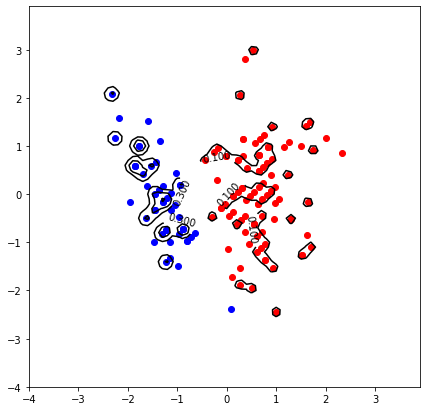

In [12]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(clf.predict)
plt.show()

In [13]:

#gr_dataset()
x = np.arange(-4, 4, .1)
y = np.arange(-4, 4, .1)
X, Y = np.meshgrid(x, y)
#print(Y)
zs = np.array([clf.predict(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
normalized = (Z-Z.min())/(Z.max()-Z.min())
#gr_membership_contour(clf.predict)

#plt.show()

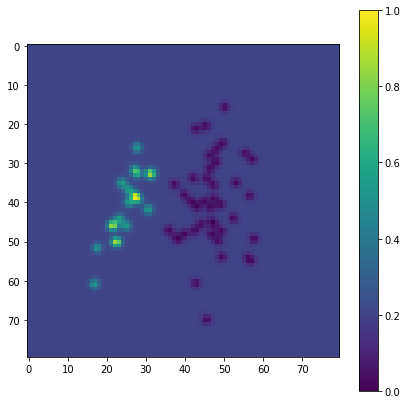

In [19]:
plt.figure(figsize=(7,7))
plt.imshow(normalized)
plt.colorbar()
plt.show()